In [1]:
import numpy as np

def make_sequences(X, y, seq_len=10):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X.iloc[i:i+seq_len].values)
        ys.append(y.iloc[i+seq_len])
    return np.array(Xs), np.array(ys)


In [2]:
import pandas as pd
import sys
import os

root = os.path.abspath(os.path.join('..'))
if root not in sys.path:
    sys.path.append(root)

from src.split import time_series_split
from src.metrics import regression_metrics
from src.models.lstm_model import train_lstm_model, predict


In [3]:
metrics = pd.read_csv("../data/processed/metrics_full.csv")
metrics["timestamp"] = pd.to_datetime(metrics["timestamp"])
metrics = metrics.set_index("timestamp")

metrics.shape


(89255, 25)

In [4]:
TARGETS = ["requests", "bytes"]

HORIZONS = {
    "1m": 1,
    "5m": 5,
    "15m": 15
}

SPLIT_DATE = "1995-08-23"
SEQ_LEN = 10

results = []


In [5]:
for target in TARGETS:
    for window_name, horizon in HORIZONS.items():

        print(f"LSTM | Target={target} | Horizon={window_name}")

        label_col = f"{target}_future_{horizon}"

        X_train_df, X_test_df, y_train_df, y_test_df = time_series_split(
            metrics,
            split_date=SPLIT_DATE,
            label_col=label_col
        )

        X_train, y_train = make_sequences(X_train_df, y_train_df, SEQ_LEN)
        X_test, y_test = make_sequences(X_test_df, y_test_df, SEQ_LEN)

        model = train_lstm_model(
            X_train,
            y_train,
            epochs=20,
            batch_size=64
        )

        y_pred = predict(model, X_test)

        scores = regression_metrics(y_test, y_pred)

        results.append({
            "Model": "LSTM",
            "Target": target,
            "Window": window_name,
            **scores
        })


LSTM | Target=requests | Horizon=1m


d:\Dataflow\AUTOSCALING ANALYSIS\autoscaling-analysis\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 1446.5347
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 902.1621
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 826.3683
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 825.8175
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 809.4346
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 769.1014
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 777.4778
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 781.1378
Epoch 9/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 801.4906
Epoch 10/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 814.8668
Epoch 11/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 824.5268
Epoch 12/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 812.3907
Epoch 13/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 859.9724
Epoch 14/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step -

d:\Dataflow\AUTOSCALING ANALYSIS\autoscaling-analysis\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 1573.6570
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 870.0471
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 852.1790
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 798.2846
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 829.7365
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 831.7540
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 802.6417
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 817.7518
Epoch 9/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 831.6185
Epoch 10/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 816.7064
Epoch 11/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 801.6078
Epoch 12/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 814.5079
Epoch 13/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 806.3491
Epoch 14/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 

d:\Dataflow\AUTOSCALING ANALYSIS\autoscaling-analysis\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 1531.9242
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 916.4049
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 827.6333
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 797.5982
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 799.2616
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 792.7509
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 818.7349
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 801.1384
Epoch 9/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 810.7614
Epoch 10/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 823.3500
Epoch 11/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 796.6629
Epoch 12/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 779.5884
Epoch 13/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 783.0840
Epoch 14/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step 

d:\Dataflow\AUTOSCALING ANALYSIS\autoscaling-analysis\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 1092064051200.0000
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 1091983114240.0000
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 1091881467904.0000
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1091785523200.0000
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 1091694362624.0000
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 1091609231360.0000
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 1091521413120.0000
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1091434381312.0000
Epoch 9/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 1091350167552.0000
Epoch 10/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - loss: 1091270213632.0000
Epoch 11/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 32s 27ms/step - loss: 1091180036096.0000
Epoch 12/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - loss: 1091096739840.0000
Epoch 13/20


d:\Dataflow\AUTOSCALING ANALYSIS\autoscaling-analysis\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - loss: 1092001005568.0000
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - loss: 1091905847296.0000
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - loss: 1091812065280.0000
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - loss: 1091719790592.0000
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - loss: 1091634659328.0000
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - loss: 1091552477184.0000
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - loss: 1091466690560.0000
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 1091375529984.0000
Epoch 9/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 1091289153536.0000
Epoch 10/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - loss: 1091190521856.0000
Epoch 11/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - loss: 1091104210944.0000
Epoch 12/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - loss: 1091015802880.0000
E

d:\Dataflow\AUTOSCALING ANALYSIS\autoscaling-analysis\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - loss: 1091753345024.0000
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - loss: 1091648421888.0000
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - loss: 1091544285184.0000
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 1091442704384.0000
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - loss: 1091348398080.0000
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - loss: 1091253108736.0000
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 1091161030656.0000
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - loss: 1091070197760.0000
Epoch 9/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - loss: 1090977988608.0000
Epoch 10/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - loss: 1090886565888.0000
Epoch 11/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - loss: 1090796060672.0000
Epoch 12/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 1090707324928.0000
E

In [6]:
results_df = pd.DataFrame(results)
results_df


,Model,Target,Window,RMSE,MSE,MAE,MAPE (%)
0,LSTM,requests,1m,26.248678,6.889931e+02,20.463249,6.303468e+06
1,LSTM,requests,5m,26.029723,6.775465e+02,20.502950,8.819809e+06
2,LSTM,requests,15m,26.069772,6.796330e+02,20.652797,9.523880e+06
3,LSTM,bytes,1m,868671.030394,7.545894e+11,655076.272220,3.737972e+08
4,LSTM,bytes,5m,868450.142968,7.542057e+11,654912.281506,3.857612e+08
5,LSTM,bytes,15m,868354.686517,7.540399e+11,654832.056975,4.023857e+08


In [7]:
results_df.to_csv(
    "../data/processed/lstm_benchmark_results.csv",
    index=False
)


Epoch 1/20


d:\Dataflow\AUTOSCALING ANALYSIS\autoscaling-analysis\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - loss: 1507.8329
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - loss: 924.6186
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - loss: 846.0043
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - loss: 788.9282
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - loss: 791.9748
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 794.3894
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 790.8770
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 776.5523
Epoch 9/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - loss: 778.5926
Epoch 10/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - loss: 776.7566
Epoch 11/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 797.9055
Epoch 12/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 771.5545
Epoch 13/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 793.5067
Epoch 14/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step 

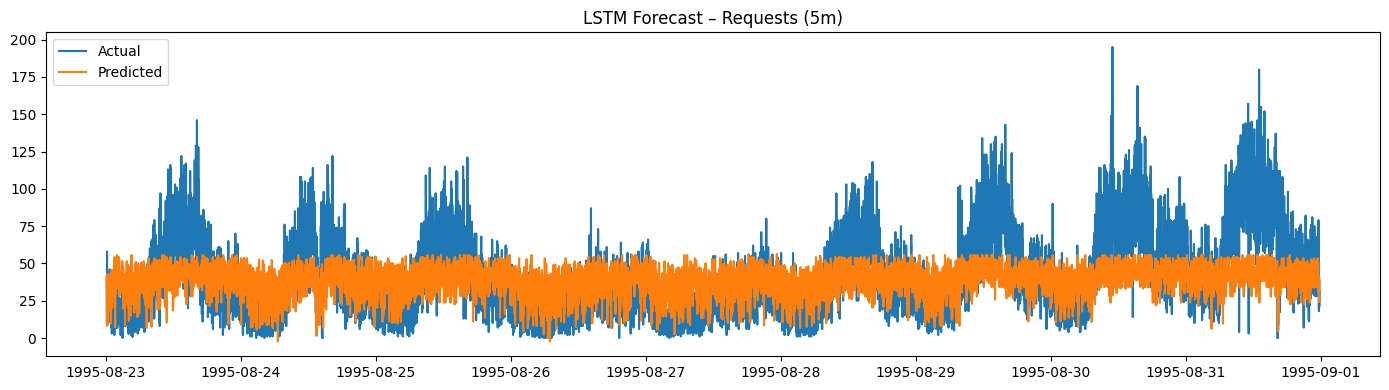

In [8]:
import matplotlib.pyplot as plt

label_col = "requests_future_5"

X_train_df, X_test_df, y_train_df, y_test_df = time_series_split(
    metrics,
    split_date=SPLIT_DATE,
    label_col=label_col
)

X_train, y_train = make_sequences(X_train_df, y_train_df, SEQ_LEN)
X_test, y_test = make_sequences(X_test_df, y_test_df, SEQ_LEN)

model = train_lstm_model(X_train, y_train, epochs=20)
y_pred = predict(model, X_test)

plt.figure(figsize=(14,4))
plt.plot(y_test_df.index[SEQ_LEN:], y_test, label="Actual")
plt.plot(y_test_df.index[SEQ_LEN:], y_pred, label="Predicted")
plt.title("LSTM Forecast – Requests (5m)")
plt.legend()
plt.tight_layout()
plt.show()
